<a href="https://colab.research.google.com/github/pkaewmanee/Python/blob/main/Project_Covid_19_A_Vaccination_vs_Death.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 1: Vaccination vs Death
In this part we investigate how vaccination can help reduce deaths due to COVID-19

**Question: For each continent does vaccination help with reducing deaths due to COVID-19**

In [ ]:
#Dataset Link
!wget https://covid.ourworldindata.org/data/owid-covid-data.csv

--2023-02-01 07:46:02--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.138, 104.21.233.137, 2606:4700:3038::6815:e98a, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv     [      <=>           ]  67.55M  66.7MB/s    in 1.0s    

2023-02-01 07:46:03 (66.7 MB/s) - ‘owid-covid-data.csv’ saved [70833909]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

In [ ]:
df = pd.read_csv('owid-covid-data.csv')

data_by_continent = df.groupby(['continent'])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Group it by Continent (Asia, Europe, South A, North A, Oceania)
df1 = data_by_continent.get_group('Asia')
df2 = data_by_continent.get_group('Europe')
df3 = data_by_continent.get_group('North America')
df4 = data_by_continent.get_group('South America')
df5 = data_by_continent.get_group('Oceania')

In [ ]:
#Group Each continent by date as well as readjusting it

#Chinaland
df1['date'] = pd.to_datetime(df1['date'])
df1.sort_values('date', inplace=True)
df1 = df1.groupby(['date'])

#Warmongers
df2['date'] = pd.to_datetime(df2['date'])
df2.sort_values('date', inplace=True)
df2 = df2.groupby(['date'])

#Empire calling itself country
df3['date'] = pd.to_datetime(df3['date'])
df3.sort_values('date', inplace=True)
df3 = df3.groupby(['date'])

#Imagine if Spain didn't want gold
df4['date'] = pd.to_datetime(df4['date'])
df4.sort_values('date', inplace=True)
df4 = df4.groupby(['date'])

#I didn't know this one exists
df5['date'] = pd.to_datetime(df5['date'])
df5.sort_values('date', inplace=True)
df5 = df5.groupby(['date'])

<ipython-input-5-09d1cc08cf5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'])
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-5-09d1cc08cf5e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [ ]:
#Using describe for easy sakes
df1_data = df1.describe()
df2_data = df2.describe()
df3_data = df3.describe()
df4_data = df4.describe()
df5_data = df5.describe()

In [ ]:
#Isolating total deaths out of describe
df1_total_death = df1_data['total_deaths']
df2_total_death = df2_data['total_deaths']
df3_total_death = df3_data['total_deaths']
df4_total_death= df4_data['total_deaths']
df5_total_death = df5_data['total_deaths']

#Isolating total deaths out of describe as well
df1_people_fully_vac = df1_data['people_fully_vaccinated']
df2_people_fully_vac = df2_data['people_fully_vaccinated']
df3_people_fully_vac = df3_data['people_fully_vaccinated']
df4_people_fully_vac = df4_data['people_fully_vaccinated']
df5_people_fully_vac = df5_data['people_fully_vaccinated']

In [ ]:
#Method for removing/dropping data that aren't going to be used in tbe graph
def drop_data(df):
    df = df.drop(['count','mean','std','min','25%','50%','75%'], axis='columns')
    # Since the columns drop are all the same this is more cleaner code IMHO.
    return df

In [ ]:
#Storing the removed data into the new variables
df1_total_death = drop_data(df1_total_death)
df2_total_death = drop_data(df2_total_death)
df3_total_death = drop_data(df3_total_death)
df4_total_death = drop_data(df4_total_death)
df5_total_death = drop_data(df5_total_death)

df1_people_fully_vac = drop_data(df1_people_fully_vac)
df2_people_fully_vac = drop_data(df2_people_fully_vac)
df3_people_fully_vac = drop_data(df3_people_fully_vac)
df4_people_fully_vac = drop_data(df4_people_fully_vac)
df5_people_fully_vac = drop_data(df5_people_fully_vac)

In [ ]:
#Due to some error occuring when trying to plot pivoting the data into a csv file then reusing it is easier
def csv_fix(x,y):
  x.to_csv(y)
  x = pd.read_csv(y)
  return x

In [ ]:
#Store it into a new varibles for graph
df1_death = csv_fix(df1_total_death,'total_death_in_asia.csv')
df2_death = csv_fix(df2_total_death,'total_death_in_europe.csv')
df3_death = csv_fix(df3_total_death,'total_death_in_na.csv')
df4_death = csv_fix(df4_total_death,'total_death_in_sa.csv')
df5_death = csv_fix(df5_total_death,'total_death_in_oceania.csv')

df1_fully_vac = csv_fix(df1_people_fully_vac,'people_fully_vac_in_asia.csv')
df2_fully_vac = csv_fix(df2_people_fully_vac,'people_fully_vac_in_europe.csv')
df3_fully_vac = csv_fix(df3_people_fully_vac,'people_fully_vac_in_na.csv')
df4_fully_vac = csv_fix(df4_people_fully_vac,'people_fully_vac_in_sa.csv')
df5_fully_vac = csv_fix(df5_people_fully_vac,'people_fully_vac_in_oceania.csv')

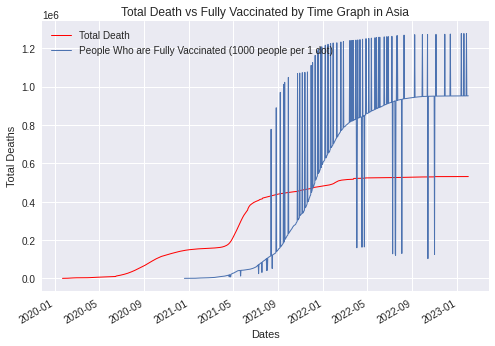

In [ ]:
#Plot Asia Continent

plt.style.use('seaborn')

df1_death['date'] = pd.to_datetime(df1_death['date'])
df1_death.sort_values('date', inplace=True)

date_data_asia = df1_death['date']
total_deaths_data_asia = df1_death['max']
fully_vac_data_asia = df1_fully_vac['max']/1000

plt.plot(date_data_asia, total_deaths_data_asia, linewidth ='1', color='red')
plt.plot(date_data_asia, fully_vac_data_asia, linewidth ='1')

plt.gcf().autofmt_xdate()

plt.title('Total Death vs Fully Vaccinated by Time Graph in Asia')
plt.xlabel('Dates')
plt.ylabel('Total Deaths')

plt.legend(["Total Death","People Who are Fully Vaccinated (1000 people per 1 dot)"])

plt.show()

#Explanation
* From the graph above shows that the total of people died per one millions in Asia Continent steady increase from January of 2020 to late July of 2020.

* Then it took a slight growth during the late July to January of 2021 before once again it took a steady growth until April of 2021.

* During the month of May of 2021, the data shows a sharp increases in total death rate until the early of July where it gradually increases until October. 

* The line graph of people who are fully vaccinated are represented by 1000 people per dot.

* The data begin around February of 2021 which show a slow gradual growth until the end of June of the same year

* Then the data from then on took a steady rise until the end of the known data.

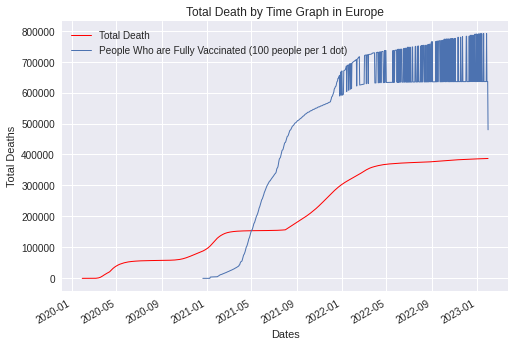

In [ ]:
#Plot Europe Continent

plt.style.use('seaborn')

df2_death['date'] = pd.to_datetime(df2_death['date'])
df2_death.sort_values('date', inplace=True)

date_data_europe = df2_death['date']
total_deaths_data_europe = df2_death['max']
fully_vac_data_europe = (df2_fully_vac['max']/100)

plt.plot(date_data_europe, total_deaths_data_europe, linewidth ='1', color='red')
plt.plot(date_data_europe, fully_vac_data_europe, linewidth ='1')

plt.gcf().autofmt_xdate()

plt.title('Total Death by Time Graph in Europe')
plt.xlabel('Dates')
plt.ylabel('Total Deaths')

plt.legend(["Total Death","People Who are Fully Vaccinated (100 people per 1 dot)"])

plt.show()

#Explanation
* From the graph above shows a steady rate of total death rate in Europe since the middle of February of 2020 to April of the same year.

* Then the data took a slight increase from Late April to the end of July.

* Then the data once again become once again steady until the start of November.

* Then the data from November until March of 2021 shows a marked growth before once again becoming stable.

* Then the data took a sharp increases from July of 2021 until now.

* From the graph, the amount of people fully vaccinated slowly increases throughout the year until the April where the number take a sharp rise until now.

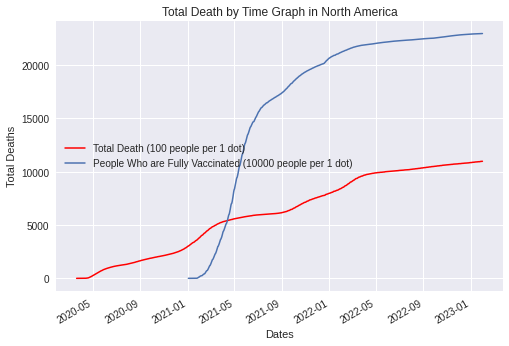

In [ ]:
#Plot North America Continent

plt.style.use('seaborn')

df3_death['date'] = pd.to_datetime(df2_death['date'])
df3_death.sort_values('date', inplace=True)

date_data_na = df3_death['date']
total_deaths_data_na = (df3_death['max']/100)
fully_vac_data_na = (df3_fully_vac['max']/10000)

plt.plot(date_data_na, total_deaths_data_na, linewidth ='1.5', color='red')
plt.plot(date_data_na, fully_vac_data_na, linewidth ='1.5')

plt.gcf().autofmt_xdate()

plt.title('Total Death by Time Graph in North America')
plt.xlabel('Dates')
plt.ylabel('Total Deaths')

plt.legend(["Total Death (100 people per 1 dot)","People Who are Fully Vaccinated (10000 people per 1 dot)"])

plt.show()

#Explaination

* From the graph above shows a steady rate of total death rate in North America since the middle of April of 2020 to the January of the following year.

* Then the data took a slight growth during late January until March. Wher it gradually increases until the end of the year 

* From the graph, the amount of people fully vaccinated slowly increases throughout the year until the April where the number take a sharp rise until now.


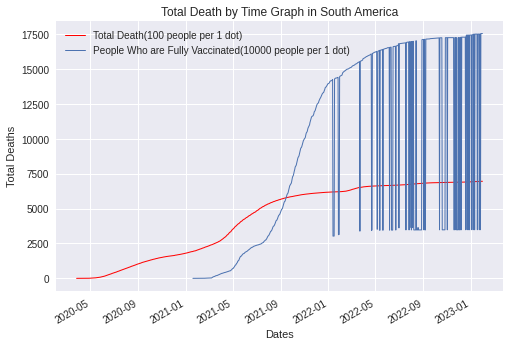

In [ ]:
#Plot South America Continent

plt.style.use('seaborn')

df4_death['date'] = pd.to_datetime(df2_death['date'])
df4_death.sort_values('date', inplace=True)

date_data_sa = df4_death['date']
total_deaths_data_sa = (df4_death['max']/100)
fully_vac_data_sa = (df4_fully_vac['max']/10000)

plt.plot(date_data_sa, total_deaths_data_sa, linewidth ='1', color='red')
plt.plot(date_data_sa, fully_vac_data_sa, linewidth ='1')

plt.gcf().autofmt_xdate()

plt.title('Total Death by Time Graph in South America')
plt.xlabel('Dates')
plt.ylabel('Total Deaths')

plt.legend(["Total Death(100 people per 1 dot)","People Who are Fully Vaccinated(10000 people per 1 dot)"])

plt.show()

#Explanation
* From the graph above shows a steady rate of total death rate in South America since the middle of April of 2020 to Late June of the same year.

* Then from July on the took a steep rise until April.

* From April of 2021 on, the data took a sharp increases until it slightly slow down during the end of September

* From the graph, the amount of people fully vaccinated slowly increases throughout the year until the July of 2021 where the number take a sharp rise until now.

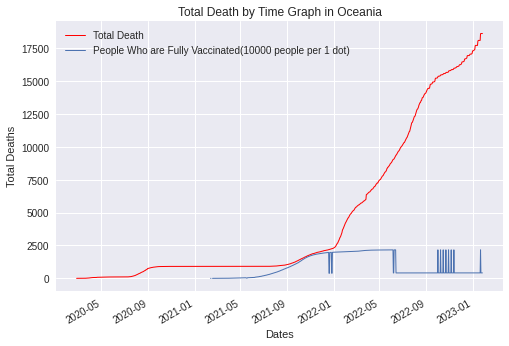

In [ ]:
#Plot Oceania Continent

plt.style.use('seaborn')

df5_death['date'] = pd.to_datetime(df2_death['date'])
df5_death.sort_values('date', inplace=True)

date_data_oceania = df5_death['date']
total_deaths_data_oceania = (df5_death['max'])
fully_vac_data_oceania = (df5_fully_vac['max']/10000)

plt.plot(date_data_oceania, total_deaths_data_oceania, linewidth ='1', color='red')
plt.plot(date_data_oceania, fully_vac_data_oceania, linewidth ='1')

plt.gcf().autofmt_xdate()

plt.title('Total Death by Time Graph in Oceania')
plt.xlabel('Dates')
plt.ylabel('Total Deaths')

plt.legend(["Total Death","People Who are Fully Vaccinated(10000 people per 1 dot)"])

plt.show()

#Explanation
* From the graph above shows a steady rate of total death rate in Oceania since the middle of March of 2020 to April of the same year.

* Then the data took a slight growth during April to May. Then take it stablized until early Agust.

* From August until the end of the October, the data show a sharp increased in total death rate, and then stablized until June of the following year.

* Then from June on, the data been taking a steep rises.

* From the graph, the amount of people fully vaccinated are zero until the May where the number take a slight rise then took a sharp increases from July of 2021 until now.

# How About Just Thailand

In [ ]:
df1 = data_by_continent.get_group('Asia')

df1_country = df1.groupby(['location'])

df1_thai = df1_country.get_group('Thailand')

df1_thai

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
224659,THA,Asia,Thailand,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,38.8,90.67,2.1,77.15,0.777,71697024.0,NaN,NaN,NaN,NaN
224660,THA,Asia,Thailand,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,38.8,90.67,2.1,77.15,0.777,71697024.0,NaN,NaN,NaN,NaN
224661,THA,Asia,Thailand,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,...,38.8,90.67,2.1,77.15,0.777,71697024.0,NaN,NaN,NaN,NaN
224662,THA,Asia,Thailand,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,...,38.8,90.67,2.1,77.15,0.777,71697024.0,NaN,NaN,NaN,NaN
224663,THA,Asia,Thailand,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,...,38.8,90.67,2.1,77.15,0.777,71697024.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225778,THA,Asia,Thailand,2023-01-27,4726512.0,0.0,89.571,33836.0,0.0,6.286,...,38.8,90.67,2.1,77.15,0.777,71697024.0,NaN,NaN,NaN,NaN
225779,THA,Asia,Thailand,2023-01-28,4726512.0,0.0,89.571,33836.0,0.0,6.286,...,38.8,90.67,2.1,77.15,0.777,71697024.0,NaN,NaN,NaN,NaN
225780,THA,Asia,Thailand,2023-01-29,4726984.0,472.0,157.000,33865.0,29.0,10.429,...,38.8,90.67,2.1,77.15,0.777,71697024.0,NaN,NaN,NaN,NaN
225781,THA,Asia,Thailand,2023-01-30,4726984.0,NaN,NaN,33865.0,NaN,NaN,...,38.8,90.67,2.1,77.15,0.777,71697024.0,NaN,NaN,NaN,NaN


<ipython-input-18-1110e4db9329>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_thai['date'] = pd.to_datetime(df1_thai['date'])
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


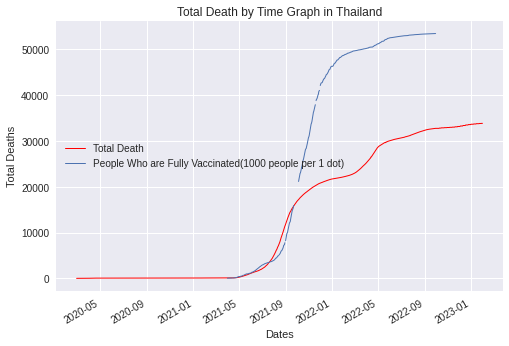

In [ ]:
plt.style.use('seaborn')

df1_thai['date'] = pd.to_datetime(df1_thai['date'])
df1_thai.sort_values('date', inplace=True)

date_df1_thai= df1_thai['date']
total_deaths_df1_thai = (df1_thai['total_deaths'])
fully_vac_df1_thai = (df1_thai['people_fully_vaccinated']/1000)

plt.plot(date_df1_thai, total_deaths_df1_thai, linewidth ='1', color='red')
plt.plot(date_df1_thai, fully_vac_df1_thai, linewidth ='1')

plt.gcf().autofmt_xdate()

plt.title('Total Death by Time Graph in Thailand')
plt.xlabel('Dates')
plt.ylabel('Total Deaths')

plt.legend(["Total Death","People Who are Fully Vaccinated(1000 people per 1 dot)"])

plt.show()